# Salary Predictor

In this notebook we're gonna predict employee salaries from different employee features. ```Multi-linear regression``` will be used to predict employee salaries.<br>

## Overview

* Data Collection
* Cleaning Data
* Correlation 
* Model
* Conclusion



We will start by importing the packages that will be required to run this notebook which include:
* Pandas
* Seaborn
* Scikit Learn
* Statsmodels
* Scipy

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats.stats import pearsonr

### Data Collection

Our data is stored in a csv file ```salary.csv```. We import our data to the notebook into a dataframe. The dataframe consists of the following columns: salary, exprior, yearsworked, yearsrank, market, degree, otherequal, position, male, Field, yearsabs.

In [2]:
salary = pd.read_csv('salary.csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In addition to our data we will import our data's meta data decribing each columns type and explaining each column what it's about and what each value means.

In [3]:
salary_meta = pd.read_csv('Salary metadata.csv', delimiter=';')
salary_meta

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


### Cleaning Data



We will now check the dataframe for missing values. To which column(s) has missing values if any.

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


We find that only the salary column has a missing value.

In [5]:
salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [6]:
salary['position'].unique()

array([1, 2, 3], dtype=int64)

We will fill the missing value from the ```salary``` column with the mean of the salary. However not all the records are for the same position. To make sure we the fill in the correct value, we will filter the dataframe by the position of that specific employee. First we need to find the position of the employee, and by doing so we create a function to find the emploee's position.

In [7]:
def find_null_postition(df):
    for pos in df['position'].unique():
        if df[(df.position == pos)]['salary'].isnull().sum():
            return pos

By checking the meta data for our data we find that the ```position``` column is a categorical column with numerical values, and our meta data reveals that:
* 1 = Junior Employee
* 2 = Manager
* 3 = Executive

We find that our employee's missing salary is an executive.

In [8]:
salary_meta['Explanation'].iloc[7]

'Position (1 = Junior Employee, 2 = Manager, 3 = Executive)'

In [9]:
pos = find_null_postition(salary)
pos #3 - Executive

3

We filter our dataframe according to the employee's position (3) executive and get the mean of executive salaries. Fill the missing data with the mean of executives.

In [10]:
fill = salary[salary.position == pos]['salary'].mean()
fill

61180.2712984762

In [11]:
salary['salary'].fillna(fill, inplace=True)

Checking for the correlation between the columns.

In [14]:
salary.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.118900,0.624102,0.610916,0.406749,0.044825,0.166678,0.702580,0.362127,-0.496095,-0.070139
exprior,0.118900,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.624102,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610916,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.406749,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044825,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.166678,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.702580,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.362127,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.496095,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


We find that ```yearsworked```, ```yearsrank``` and ```position``` columns have a high correlation to the ```salary``` column. Since ```position``` is categorical, only ```yearsworked``` and ```yearsrank``` to model multi-linear regression.

In [15]:
sns.set(color_codes=True)

Distribution plot for ```yearsrank``` is skewed.

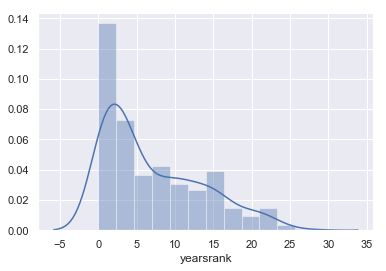

In [16]:
sns.distplot(salary.yearsrank)

Regression plot for ```yearsrank```, the points are scattered around the best fit line, not necessary close to the best fit line. There are a few outliers.

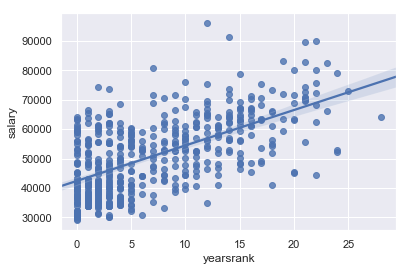

In [17]:
sns.regplot(x='yearsrank', y='salary', data=salary)

For ```yearsrank``` with the correlation of 0.61 we check for the p-value to determine if it is good to model with. With a p-value of less than 0.05 ``` yearsrank``` can be used in the model.

In [21]:
pearsonr(salary['yearsrank'],salary['salary'])

(0.6109158267807664, 6.62988413817198e-54)

Distribution plot for ```yearsworked``` is skewed and is binomial.

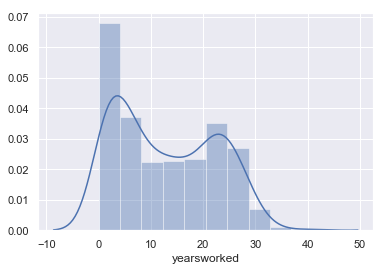

In [18]:
sns.distplot(salary.yearsworked)

Regression plot for ```yearsworked```, the points are scattered around the best fit line, not necessary close to the best fit line. There are a few outliers.

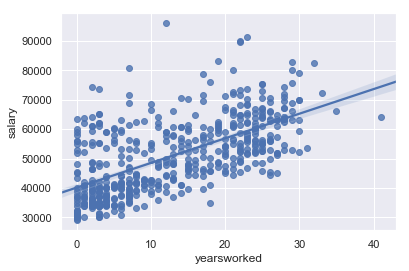

In [19]:
sns.regplot(x='yearsworked', y='salary', data=salary)

For ```yearsworked``` with the correlation of 0.62 we check for the p-value to determine if it is good to model with. With a p-value of less than 0.05 ``` yearsworked``` can be used in the model.

In [20]:
pearsonr(salary['yearsworked'], salary['salary'])

(0.624102296641541, 7.680408806634552e-57)

We create dummies for the categorical column ```Field```

In [38]:
salary_processed = pd.get_dummies(salary, prefix_sep='__', columns=['Field'])

In [39]:
salary_processed.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Field__1,Field__2,Field__3,Field__4
0,53000.0,0,0,0,1.17,1,0,1,1,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,2,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,1,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,1,0,0,0,1


A correlation matrix to compare the relationship of salary to the predictor variables.

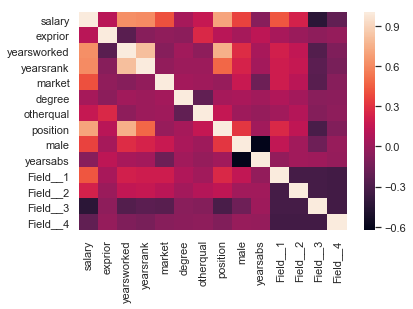

In [40]:
sns.heatmap(salary_processed.corr())

Creating ```X``` and ```y``` variable for training and testing data.

In [26]:
X = salary[['yearsworked','yearsrank']]
y = salary['salary']

Spliting the data to the ration 80/20 train/split.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Fitting the model of the training data for ```X``` and ```y``` using ```statsmodels``` module.

In [28]:
model = sm.OLS(y_train, X_train).fit()

Using the trained model to predict the value in the ```y test``` data

In [29]:
prediction = model.predict(X_test)

Plotting the regression plot data of the ```predicted``` data against the ```y test``` data.

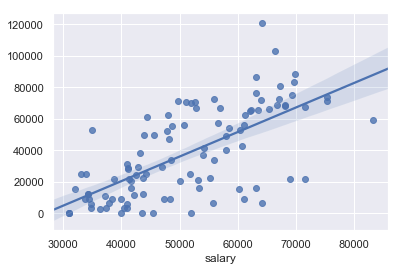

In [30]:
sns.regplot(x=y_test, y=prediction)

```Statsmodels``` summary of the plot, which will show us a summary of a few values which include:
* R-squared
* Coefficient
* Standard Error
* p-value
* 95% Confidence Interval
* and more...

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     652.5
Date:                Mon, 14 Oct 2019   Prob (F-statistic):          5.57e-128
Time:                        08:41:52   Log-Likelihood:                -4755.0
No. Observations:                 411   AIC:                             9514.
Df Residuals:                     409   BIC:                             9522.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2621.1726    200.043     13.103      0.000    2227.932    3014.413
yearsrank     478.6229    335.578      1.426      0.155    -181.049    1138.295
==============================================================================
Omnibus:                       10.485   Durbin-Watson:                   1.340
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                5.649
Skew:                           0.005   Prob(JB):                       0.0593
Kurtosis:                       2.426   Cond. No.                         5.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Combining the data of the model's dependant variable (```salary```), predictor variables (```yearsworked```and ```yearsrank```), predicted value from the model and the residual.

In [32]:
predicted = pd.concat([X_test, y_test, prediction], axis=1)
predicted.rename(columns={0:'Prediction'}, inplace=True)
predicted['Residual'] = predicted['salary'] - predicted['Prediction']
predicted.head()

,yearsworked,yearsrank,salary,Prediction,Residual
302,19,13,61123.0,56024.377319,5098.622681
115,9,3,34000.0,25026.422191,8973.577809
273,23,12,65432.0,66030.444851,-598.444851
164,5,5,60190.0,15498.977564,44691.022436
457,9,2,42603.0,24547.799287,18055.200713


In [33]:
Residual = y_test - prediction

Plotting the residuals of the model.

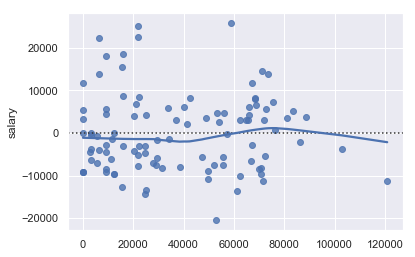

In [34]:
sns.residplot(x=prediction, y=y_test, lowess=True)

Fitting the model of the test data for ```X``` and ```y``` using ```statsmodels``` module.

In [35]:
model_test = sm.OLS(y_test, X_test).fit()

```Statsmodels``` summary of the plot, which will show us a summary of the model.

In [36]:
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     160.5
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           4.34e-32
Time:                        08:41:54   Log-Likelihood:                -1192.1
No. Observations:                 103   AIC:                             2388.
Df Residuals:                     101   BIC:                             2393.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2282.8311    436.837      5.226      0.000    1416.264    3149.398
yearsrank     923.4472    723.805      1.276      0.205    -512.388    2359.282
==============================================================================
Omnibus:                        1.762   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.661
Skew:                          -0.307   Prob(JB):                        0.436
Kurtosis:                       2.895   Cond. No.                         6.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""